In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dma_supplychain1 = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Aki",
  database="dma_supplychain"
)

In [3]:
dma_supplychain_df1 = dma_supplychain1.cursor()
dma_supplychain_df1.execute("select pid, sum(sale_amount) as sales, sum(profit) as profit from saleitems group by pid order by sales desc limit 10;")
sales = dma_supplychain_df1.fetchall()
Sales_df = pd.DataFrame(sales, columns=dma_supplychain_df1.column_names)

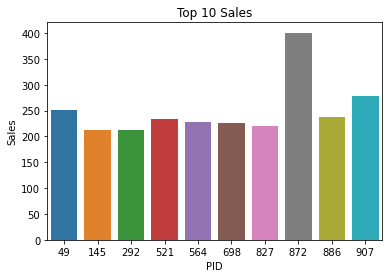

In [4]:
sns.barplot(x='pid', y='sales', data=Sales_df)

# Add labels and title to the plot
plt.xlabel('PID')
plt.ylabel('Sales')
plt.title('Top 10 Sales')

# Show the plot
plt.show()

In [5]:
dma_supplychain2 = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Aki",
  database="dma_supplychain"
)

In [6]:
dma_supplychain_df2 = dma_supplychain2.cursor()
dma_supplychain_df2.execute("with custumer_order_count as (select cid, count(oid) as total_count, order_date from orders group by order_date ) select cid, total_count, order_date from custumer_order_count order by 2 desc limit 10;")
customers = dma_supplychain_df2.fetchall()
customers_df = pd.DataFrame(customers, columns=dma_supplychain_df2.column_names)

Text(0.5, 1.0, 'Top 10 Customer Purchases')

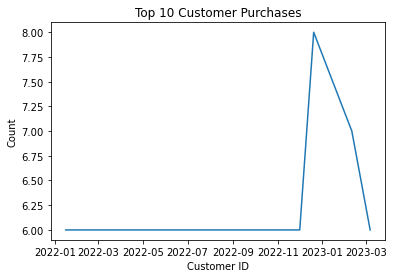

In [7]:
# Create the line plot using Seaborn
sns.lineplot(x='order_date', y='total_count', data=customers_df)

# Add labels and title to the plot
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.title('Top 10 Customer Purchases')

In [8]:
dma_supplychain3 = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Aki",
  database="dma_supplychain"
)

In [9]:
dma_supplychain_df3 = dma_supplychain3.cursor()
dma_supplychain_df3.execute("select IID, stock_level from inventory where IID in (select IID from inventory i where 15 > (select count(*) from inventory ii where i.stock_level < ii.stock_level)order by IID);")
stock = dma_supplychain_df3.fetchall()
stock_df = pd.DataFrame(stock, columns=dma_supplychain_df3.column_names)

In [10]:
stock_df

,IID,stock_level
0,49,997
1,76,998
2,165,994
3,249,989
4,252,998
5,308,991
6,338,995
7,342,997
8,432,988
9,465,992


In [26]:
stock_df=stock_df.sort_values('stock_level')

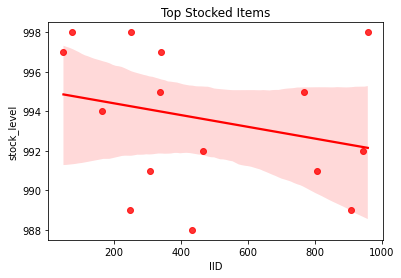

In [31]:
# sns.lineplot(x='IID', y='stock_level', data=stock_df, color='skyblue', alpha=0.5)
# sns.fill_between(x='IID', y1=0, y2=stock_df['stock_level'], color='skyblue', alpha=0.3)

# Create the scatter plot using Seaborn
sns.regplot(x='IID', y='stock_level', data=stock_df, color='red')

# Add labels and title to the plot
plt.xlabel('IID')
plt.ylabel('stock_level')
plt.title('Top Stocked Items')

# Show the plot
plt.show()